In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
data = pd.read_csv('../data/oasis_longitudinal.csv')

In [47]:
data = data.dropna(subset=['CDR','Group', 'Visit', 'MR Delay', 'M/F', 'Hand', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'])

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  354 non-null    object 
 1   MRI ID      354 non-null    object 
 2   Group       354 non-null    object 
 3   Visit       354 non-null    int64  
 4   MR Delay    354 non-null    int64  
 5   M/F         354 non-null    object 
 6   Hand        354 non-null    object 
 7   Age         354 non-null    int64  
 8   EDUC        354 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        354 non-null    float64
 11  CDR         354 non-null    float64
 12  eTIV        354 non-null    int64  
 13  nWBV        354 non-null    float64
 14  ASF         354 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 44.2+ KB


In [51]:
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039


In [53]:
data.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,1.884181,601.353107,77.033898,14.703390,2.460452,27.409605,0.271186,1489.991525,0.729879,1.193780
std,0.925330,640.596081,7.811808,2.895662,1.134005,3.712626,0.370537,175.768462,0.037842,0.136821
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1358.250000,0.699000,1.100250
50%,2.000000,559.500000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.500000,0.729000,1.193500
75%,2.000000,882.500000,82.000000,16.750000,3.000000,30.000000,0.500000,1595.250000,0.757000,1.292500
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


<Axes: >

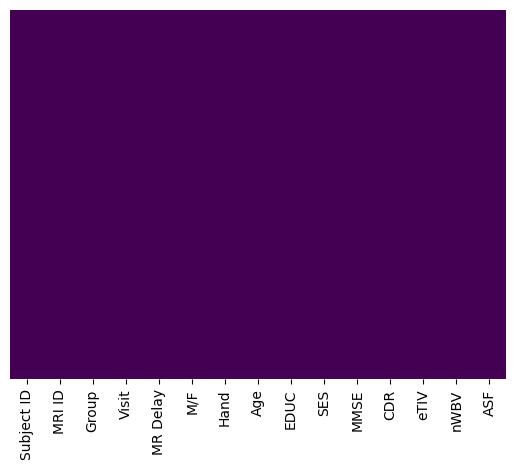

In [55]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [57]:
pp_data = data.drop(['Subject ID','MRI ID', 'Hand','Group'], axis = 1)
pp_data['CDR'] = pp_data['CDR'].apply(lambda x: 1 if x > 0 else x)
pp_data.head()

,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,1,0,F,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,2,538,F,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,1,0,M,80,12,4.0,28.0,0.0,1689,0.712,1.039


<Axes: >

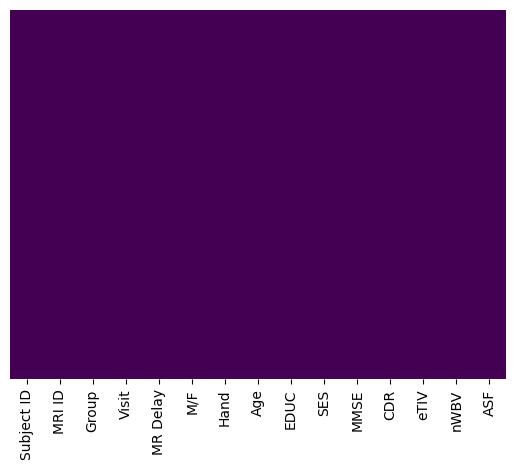

In [59]:
pp_data = pp_data.dropna(subset=['SES', 'MMSE'])
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [61]:
mapping = {'M': 0, 'F': 1}  
pp_data['M/F'] = pp_data['M/F'].map(mapping)

In [63]:
X = pp_data.drop('CDR', axis =1)
y = pp_data['CDR']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [67]:
logreg = LogisticRegression(solver = 'liblinear',max_iter=2000)

In [29]:
param_grid = {"C": np.logspace(-3, 3, 20), "penalty": ["l1", "l2"]}

In [31]:
grid_search = GridSearchCV(logreg, param_grid=param_grid, cv=5)

In [33]:
grid_search.fit(X_train, y_train)

ValueError: 
All the 200 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jojeo\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jojeo\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\jojeo\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py", line 1222, in fit
    X, y = validate_data(
  File "C:\Users\jojeo\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\jojeo\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py", line 1370, in check_X_y
    X = check_array(
  File "C:\Users\jojeo\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py", line 1107, in check_array
    _assert_all_finite(
  File "C:\Users\jojeo\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py", line 120, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "C:\Users\jojeo\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py", line 169, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [134]:
grid_search.best_estimator_

LogisticRegression(C=483.2930238571752, max_iter=2000, penalty='l1',
                   solver='liblinear')

In [69]:
logreg = LogisticRegression(C=54.555947811685144, max_iter=2000, penalty='l1',
                   solver='liblinear')

In [71]:
logreg.fit(X_train, y_train)

LogisticRegression(C=54.555947811685144, max_iter=2000, penalty='l1',
                   solver='liblinear')

In [73]:
predictions = logreg.predict(X_test)

In [75]:
print(confusion_matrix(y_test,predictions))

[[55  8]
 [15 29]]


In [77]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.79      0.87      0.83        63
         1.0       0.78      0.66      0.72        44

    accuracy                           0.79       107
   macro avg       0.78      0.77      0.77       107
weighted avg       0.78      0.79      0.78       107



Text(0.5, 1.0, 'Confusion Matrix')

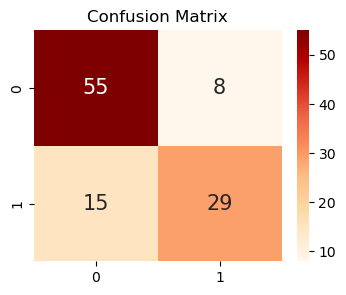

In [79]:
confu = confusion_matrix(y_test,predictions)
plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')